## Preparación del notebook

In [11]:
# Importar Librerias
# ==============================================================================
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

# Cargar datos
# ==============================================================================
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)
print(dataframe.shape)

(768, 9)


In [12]:
# Separación de caracteristicas y target
# ==============================================================================
X = dataframe.drop(columns = "class")
y = dataframe['class']

# split de datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

## Decision Tree Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [13]:
# Entrenamiento del modelo
# ==============================================================================
clf = tree.DecisionTreeClassifier(
          criterion = 'gini',
          max_depth = 6,
          max_leaf_nodes=10,
          random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=0)

In [14]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, clf.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, clf.predict(X_test)))

Train - Accuracy : 0.7736156351791531
Train - classification report:
               precision    recall  f1-score   support

           0       0.77      0.92      0.84       393
           1       0.78      0.52      0.62       221

    accuracy                           0.77       614
   macro avg       0.78      0.72      0.73       614
weighted avg       0.77      0.77      0.76       614

Test - Accuracy : 0.7792207792207793
Test - classification report :               precision    recall  f1-score   support

           0       0.79      0.93      0.85       107
           1       0.72      0.45      0.55        47

    accuracy                           0.78       154
   macro avg       0.76      0.69      0.70       154
weighted avg       0.77      0.78      0.76       154



In [15]:
from sklearn.metrics import recall_score
print ("Train - recall:\n", metrics.recall_score(y_train, clf.predict(X_train)))
print ("Test - recall :", metrics.recall_score(y_test, clf.predict(X_test)))

Train - recall:
 0.5158371040723982
Test - recall : 0.44680851063829785


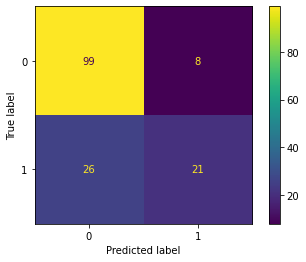

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_test, clf.predict(X_test))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

Profundidad del árbol: 5
Número de nodos terminales: 10


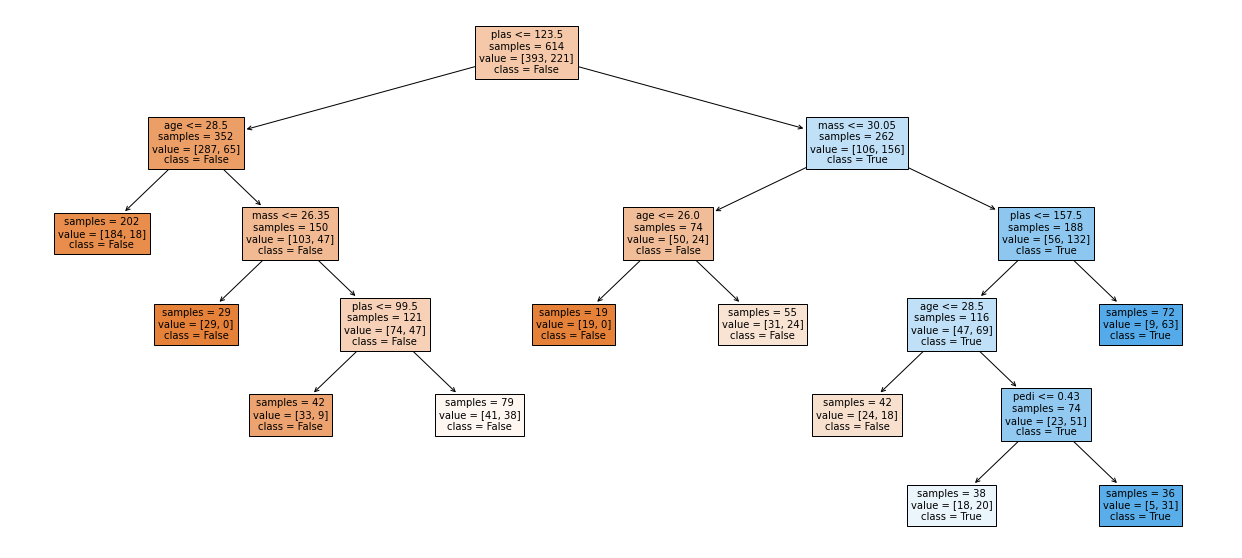

In [17]:
# Visualización del arbol
# ==============================================================================
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(22, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = X.columns.tolist(),
            class_names   = ['False', 'True'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

## Random Forest Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [18]:
from sklearn.ensemble import RandomForestClassifier
# Entrenamiento del modelo
# ==============================================================================
ranfor = RandomForestClassifier(
            n_estimators = 150,
            criterion    = 'gini',
            max_depth    = 5,
            max_leaf_nodes = 10,
            n_jobs       = -1,
            random_state = 123
         )
ranfor.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=10, n_estimators=150,
                       n_jobs=-1, random_state=123)

In [19]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, ranfor.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, ranfor.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, ranfor.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, ranfor.predict(X_test)))

Train - Accuracy : 0.8078175895765473
Train - classification report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       393
           1       0.80      0.62      0.70       221

    accuracy                           0.81       614
   macro avg       0.81      0.77      0.78       614
weighted avg       0.81      0.81      0.80       614

Test - Accuracy : 0.7922077922077922
Test - classification report :               precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154



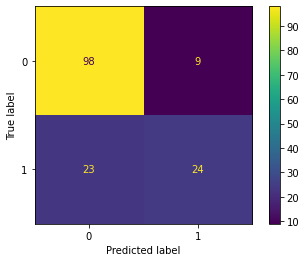

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_test, ranfor.predict(X_test))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

## Gradient Boosting Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Entrenamiento del modelo: N_ESTIMATORS = 100, LEARNING_RATE = 0.1, , MAX_DEPTH = 4
# ===================================================================================

## XGB Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [ ]:
#%pip install xgboost
from xgboost import XGBClassifier

# Entrenamiento del modelo: N_ESTIMATORS = 500, LEARNING_RATE = 0.1, , MAX_DEPTH = 4
# ===================================================================================

## Support Vector Machine

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
from sklearn.svm import SVC

# Entrenamiento del modelo SVM: KERNEL = 'rbf', C = 1.5, class_weight = 'balanced'
# =================================================================================